# Exploring Twitter data
In this notebook, we are going to use our cleaned dataset that we have created in the first notebook.

We are going to do some exploratory analysis in order to understand the shape of the data, patterns and values, correlations between features, and hidden meaning behind our data.

## Goal: 
Learn some common aspects of data exploration, calculate some statistics and visualize data column by column.

## Introduction to exploratory data analysis
[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)


### Data exploration process:
 - Computing summary statistics
 - Plotting
 - Additional wrangling if needed.

## Load python modules

Load python libraries first. Additional libraries that we are going to use in this notebook are: 
 - [wordcloud](https://amueller.github.io/word_cloud/) -  used to create wordclouds in Python
 - [nltk](https://www.nltk.org/) - natural language toolkit, library to work with language.
 - [folium](https://python-visualization.github.io/folium/) - library for creating maps.

In [78]:
try:
    import urllib.request
except ImportError:
    !pip install  --user  urllib
    import urllib.request
    
try:
    import pandas as pd
except ImportError:
    !pip install  --user  pandas
    import pandas as pd
    
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install  --user wordcloud
    from wordcloud import WordCloud
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
except ImportError:
    !pip install  --user matplotlib
    import matplotlib
    import matplotlib.pyplot as plt

%matplotlib inline

try:
    import nltk
except ImportError:
    !pip install  --user nltk
    import nltk

try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    !pip install  --user folium
    import folium
    from folium.plugins import MarkerCluster

#### First, we will download the cleaned dataset from object store and display the first 5 rows

There is a copy of the cleaned dataset we just created saved to object store. You can download it or use your local copy, created in the first notebook.
We will read the csv file into pandas dataframe and printing first 5 rows.

In [79]:
target_url="https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_233e84cd313945c992b4b585f7b9125d/geeky-summit/tweets_cleaned.csv"
file_name="tweets_cleaned.csv"
#urllib.request.urlretrieve(target_url, file_name) ## comment out this line to use your local copy 

tweets = pd.read_csv(file_name,parse_dates=['created_at_date']) ## reading 'created_at_date' column as timestamp
tweets.created_at_date= tweets.created_at_date.dt.tz_localize('UTC').dt.tz_convert('MST')
tweets.head()

,created_at_date,hashtags_string,user_string,user_location,longitude,latitude,name,screen_name,extended_tweet,extended_tweet_cleaned
0,2018-11-02 14:01:56-07:00,,Symin16,Toronto ✈ Calgary,NaN,NaN,♠,jessmayumba85,@Symin16 I’d like to know who,I’d like to know who
1,2018-11-02 14:02:01-07:00,,TwoCanSamAdams,YYC,NaN,NaN,hannahrae cuddleslug,thimblewad,"@TwoCanSamAdams Legit. There are still chunks in the sink and I can’t stand to be in the room, even though it doesn’t smell like puke anymore. I’m just so done with today.","Legit. There are still chunks in the sink and I can’t stand to be in the room, even though it doesn’t smell like puke anymore. I’m just so done with today."
2,2018-11-02 14:02:05-07:00,job Calgary SupplyChain Hiring CareerArc,,Calgary,51.004583,-114.007914,TMJ - CAL Manuf Jobs,tmj_cal_manuf,"Can you recommend anyone for this #job in #Calgary, AB? #SupplyChain #Hiring #CareerArc","Can you recommend anyone for this in , AB?"
3,2018-11-02 14:02:10-07:00,,,🌎📱,NaN,NaN,Sunny Rai,TheSunsRay,Kids See Ghosts: love this track,Kids See Ghosts: love this track
4,2018-11-02 14:02:13-07:00,Calgary job,,Calgary,50.997882,-114.074005,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to apply: barista - Store# 54359, CHINOOK CENTRE FOOD COURT - #Retail #Hiring #CareerArc","See our latest , AB and click to apply: barista - Store# 54359, CHINOOK CENTRE FOOD COURT -"


## Data Exploration

#### We will explore the data column by column 
A couple of things to keep in mind while doing this is what are we expecting from the data? Are our observations consistent with these expectations? If not, why do they not line up? Are there any trends, outliers, or interesting observations to make note of? 

### `extended_tweet_cleaned` column

Let's begin with this column as this is likely the most interesting one to us. It contains all the text data tweeted out in each tweet. We would like to analyze this further. One way to examine the tweets is by looking at word frequencies. This could be done by using a bar chart or alternatively, using a word cloud. 

As you might imagine, if  we just go ahead and create a word cloud, it will be dominated by some very commonly used words, such as "the", "or", "and", etc. In order to prevent these common words from dominating the plot, we will remove them. Commonly used words that are commonly filtered out are called "stopwords". The wordcloud package that we will be using has a pre-built list of stopwords. 

Let's import them and examine:

In [80]:
from wordcloud import  STOPWORDS
print(STOPWORDS)

{'since', 'during', 'their', "we'd", "they'll", 'then', 'in', 'some', "you're", "we're", 'get', "i'd", 'did', 'how', 'up', 'ought', "they're", 'am', 'the', "it's", 'further', 'here', 'you', 'our', "don't", 'of', 'those', 'her', 'own', 'who', 'we', 'any', "they've", 'each', 'if', 'she', 'very', 'these', "shouldn't", 'else', 'could', 'a', "hasn't", "i've", 'as', 'yourselves', 'by', 'does', 'are', 'from', 'its', 'hers', 'doing', "you'll", 'do', "they'd", "he's", "she's", 'it', 'only', 'theirs', 'can', "shan't", "she'd", "we've", 'what', 'been', 'were', 'no', 'they', 'also', 'ours', "won't", 'he', "he'd", "you'd", "i'm", "hadn't", "didn't", "that's", "can't", "where's", 'shall', 'again', 'with', 'being', 'under', 'http', 'which', 'against', 'like', "couldn't", "doesn't", 'because', 'him', "what's", "when's", 'himself', "how's", 'both', 'after', 'down', 'has', 'com', "wouldn't", 'them', 'over', 'why', "aren't", 'for', 'herself', 'itself', 'other', "he'll", "why's", 'same', "isn't", 'ourselv

Now we'll use the [WordCloud()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud) function from the wordcloud library.

In [81]:
stopwords = set(STOPWORDS)
#In the following function, random_state is set for reproducibility and collocation=False means 
#that if the same word is encountered in collocation with different words,
#it is still considered as one word (to remove duplicates)
def wordcloud(tweets,col):
    wordcloud = WordCloud(collocations=False,background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off") 

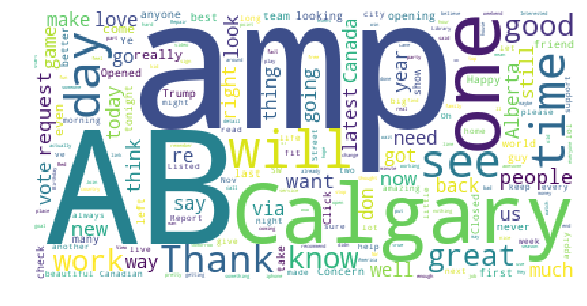

In [82]:
wordcloud(tweets,'extended_tweet_cleaned')


All these words make a lot of sense, except for... amp?? Let's find some sample tweets that will allows us to inspect them why people might be tweeting about amps. 

In [83]:
pd.set_option('max_colwidth', 700)
tweets[tweets['extended_tweet_cleaned'].str.contains("amp")]['extended_tweet_cleaned'].head(10)

6                                                     Please read and share and donate ten bucks. There are 5 homeless memorials in Canada and Calgary needs to be  . This is important. This is the starting point of our Campaign and we need to get to $10000. Give us a hand please and thank you
29                                                                                                                                                         Weather might be cold but we’re coming in hot this weekend with our brunch!!! Sat &amp; Sun at 10AM.     @ Cleaver, 50 Seats &amp; a Cow. 
69                                                                                                                                           Closed Report Concern Not Listed request at 313 18 AV SW  Completed. link: 18-01068530 corporate - encampment concerns linked nov 02, 2018 03:17:06 pm. 
86     A tale of two countries, in the US the GDP is growing, in Canada it’s slowing. In the US jobs are plentiful &am

It appears that &amp is just a shortcut for ampersand. This is a bit misleading and so let's delete all the &amp occurences from the 'extended_tweet_cleaned' column. 

What would be another way of dealing with the confusing &amp text? 

In [84]:
tweets['extended_tweet_cleaned']=tweets['extended_tweet_cleaned'].str.replace('&amp',' ')

#### Exclude "one" and "will" words
"one" and "will" words can be possibly excluded as well, they don't have any special meaning. In this case, we'll add them to the list of stop words.

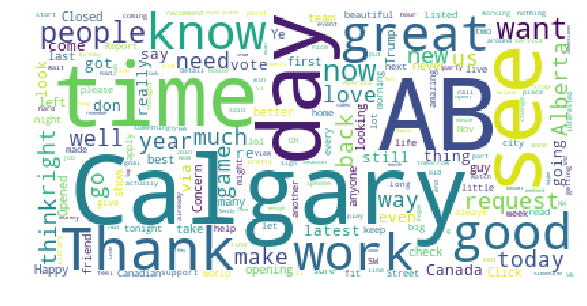

In [85]:
stopwords.add("one")
stopwords.add("will")
wordcloud(tweets,'extended_tweet_cleaned')

#### Excersise: add Calgary and AB (or other words as you like) to stowords to exclude them from wordcloud and try plotting the wordcloud again.

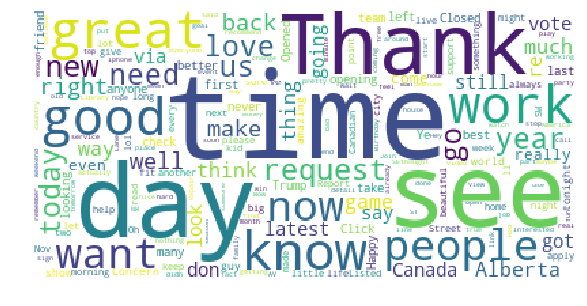

In [86]:
stopwords.add("Calgary") ## this will be hidden
stopwords.add("AB")
wordcloud(tweets,'extended_tweet_cleaned')

OK - this word cloud looks more sensible. What picture emerges from this? Are there any  themes we can identify? People seem to be thankful and discussing something about time - maybe mentioning a good time? While we can guess at some of these aspects, it's impossible to say anything about the context these words occur in. For that, we would need some more sophisticated analyses. This could include aspects like n-gram analysis or topic modelling, which is what we will take a look at in the next notebook. 

### `Created_at_date` column
This column is of type Timestamp. 
The following [features](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/) can be useful for working with the Timestamp format:
 - **dt.year** returns the year of the date time.
 - **dt.month** returns the month of the date time.
 - **dt.day** returns the day of the date time.
 - **dt.hour** returns the hour of the date time.
 - **dt.minute** returns the minute of the date time.
   
 Min/max functions can be used with timestamp as well.   
   
 Let's find out the time range first:

In [87]:
print("Time range: ",min(tweets["created_at_date"]),"-",max(tweets["created_at_date"]))

Time range:  2018-11-02 14:01:56-07:00 - 2018-11-09 10:06:22-07:00


We have data from 8 days  - from Nov 2nd to Nov 9th. 
#### Let's group by day and calculate the number of tweets for each day.

We will use the [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) command, which is a pandas function that groups rows into groups based on one or multiple columns.

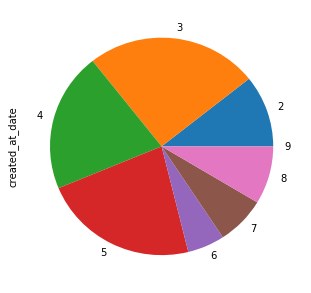

In [88]:
plt.figure(figsize=(5,5))
tweets["created_at_date"].groupby(tweets["created_at_date"].dt.day).count().plot(kind="pie")

This pie chart shows the proportion of tweets per day. The number on the circle corresponds to one of the days the data was collected. 

Another way to plot this is as a bar chart: 

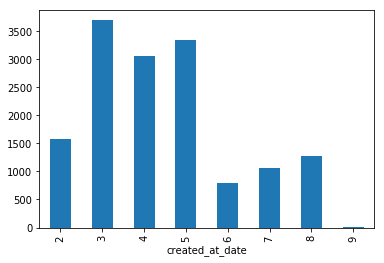

In [89]:
tweets["created_at_date"].groupby([tweets["created_at_date"].dt.day]).count().plot(kind="bar")

It looks like the most tweets took place on November 3. Let's confirm that and check out some additional summary stats. 

In [90]:
print("Total number of tweets: ",tweets.shape[0])
print("Number of tweets collected for Nov 2: ",tweets.loc[tweets["created_at_date"].dt.day==2].shape[0])
print("Number of tweets collected for Nov 3: ",tweets.loc[tweets["created_at_date"].dt.day==3].shape[0])

Total number of tweets:  14793
Number of tweets collected for Nov 2:  1580
Number of tweets collected for Nov 3:  3688


 The most data we have is for Nov 3rd and the least for Nov9.  
 #### Let's take a look at the number of tweets by hour of day and whether this make sense with what we expect. What kind of pattern would you expect? 
 
#### Exercise: Using the same methodology as for the bar chart above, can you plot the number of tweets by hour? 

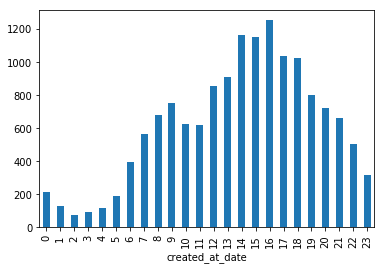

In [91]:
## this line will be hidden
tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count().plot(kind="bar")

In [92]:
print("Total number of tweets collected between 23:00 and 00:00: ", tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[23])
print("Total number of tweets collected between 09:00 and 10:00: ", tweets["created_at_date"].groupby([tweets["created_at_date"].dt.hour]).count()[9])

Total number of tweets collected between 23:00 and 00:00:  312
Total number of tweets collected between 09:00 and 10:00:  749


#### Exercise: plot tweets number by day and hour 
Hint: for two conditions in groupby() function use list format []
>instead of groupby(value) use groupby([value1,value2])

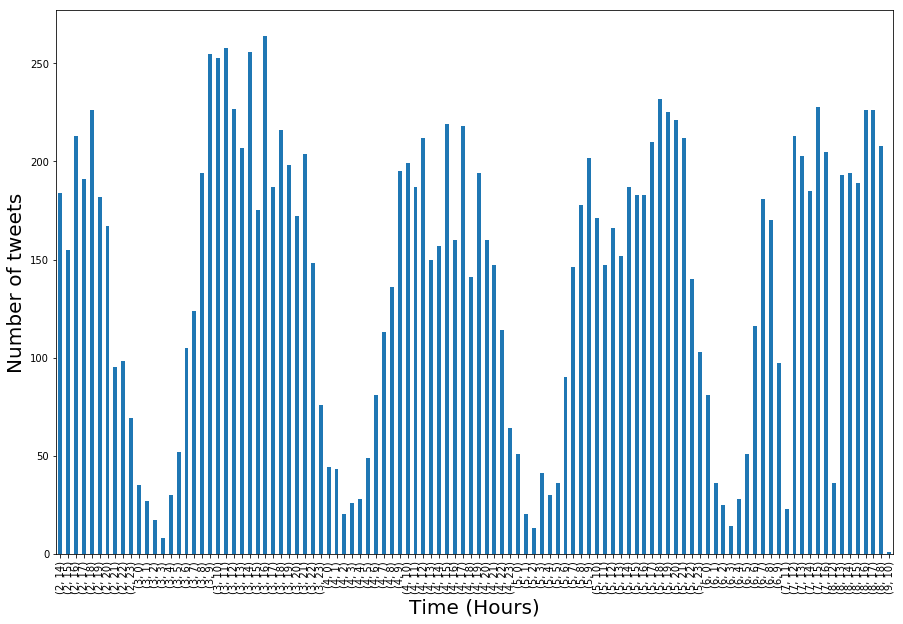

In [93]:
plt.figure( figsize=(15,10))
## this line will be hidden
ax = tweets["created_at_date"].groupby([tweets["created_at_date"].dt.day,
                                        tweets["created_at_date"].dt.hour]).count().plot(kind="bar")

ax.set_xlabel("Time (Hours)", size = 20)
ax.set_ylabel("Number of tweets", size=20)
plt.show()

OK - so far everything looks as we expected it for when the tweets were collected and at which time of day users were  most active. Let's move on to the next column. 

### `Hashtag_string`  and `user_string` columns
These two columns are of type String and have a list of hastags/user mentions separated by a blank.  
We will create a list of all the hashtags first using the [join()](https://www.tutorialspoint.com/python/string_join.htm) and [split()](https://www.w3schools.com/python/ref_string_split.asp) functions. 

In [94]:
all_hashtags=" ".join([i for i in tweets['hashtags_string']]).split()
print(all_hashtags)

['job', 'Calgary', 'SupplyChain', 'Hiring', 'CareerArc', 'Calgary', 'job', 'Calgary', 'job', 'job', 'Clerical', 'Calgary', 'Hiring', 'CareerArc', 'hiring', 'job', 'IT', 'Calgary', 'CareerArc', 'job', 'CustomerService', 'Calgary', 'Hiring', 'CareerArc', 'hiring', 'job', 'Hospitality', 'Calgary', 'CareerArc', 'job', 'Calgary', 'GeneralScience', 'Hiring', 'CareerArc', 'Murica', 'hiring', 'Calgary', 'Engineering', 'Job', 'Jobs', 'CareerArc', 'tommykplayhero', 'FakeNews', 'IllegitimatePresident', 'cleaverbeliever', 'Calgary', 'Calgary', 'job', 'Calgary', 'Marketing', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'Calgary', 'cintasjobs', 'CareerArc', 'notimpressed', 'Calgary', 'Art', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'thankyouUK', 'thirdteam', 'job', 'Calgary', 'Labor', 'Hiring', 'CareerArc', 'NFJK', 'job', 'Calgary', 'Accounting', 'Hiring', 'CareerArc', 'job', 'Calgary', 'Automotive', 'Job', 'Jobs', 'Hiring', 'CareerArc', 'This', 'canadagoosecrueltyawarenessday', 'canadagoose', 'canadagoosejack

Then we use the [FreqDist()](https://kite.com/python/docs/nltk.probability.FreqDist) function from nltk library to get frequence distribution for all the words.  That is, this function will count how many times each hashtag occurs. 

In [95]:
freque_dist=nltk.FreqDist(all_hashtags)
print("Most common hashtags: ",freque_dist.most_common(20)) ## most_common(n) function prints top n words with highest frequencies

Most common hashtags:  [('Calgary', 678), ('job', 553), ('CareerArc', 538), ('Hiring', 420), ('yyc', 229), ('hiring', 217), ('Job', 121), ('Jobs', 121), ('cdnpoli', 75), ('LoveYYC', 75), ('YYC', 49), ('Flames', 46), ('calgary', 44), ('Habs', 39), ('Hospitality', 36), ('IT', 35), ('Database', 35), ('cintasjobs', 32), ('Accounting', 32), ('BHGE', 31)]


We can also visualize this using matplotlib to print the top 25 most common hashtags. It's possible to use the [plot()](https://kite.com/python/docs/nltk.probability.FreqDist.plot) function directly with a  FreqDist object.

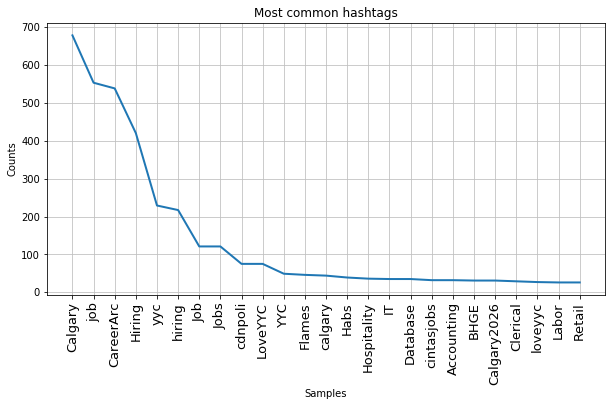

In [96]:
plt.figure(figsize=(10,5)) # plot size
plt.title("Most common hashtags")
plt.xticks(fontsize=13, rotation=90) ## Change rotation and font for x axis labels
freque_dist.plot(25)

#### Most frequent user mentions
We will do the same steps for the user_string column:

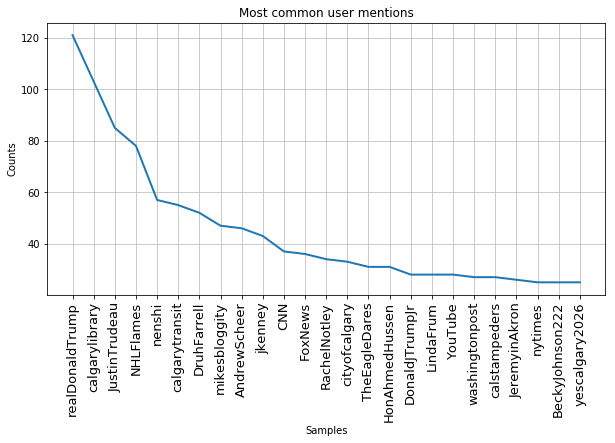

In [98]:
all_users=" ".join([i for i in tweets['user_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most common user mentions")
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_users)
fd.plot(25)

Surprisingly, or maybe not so surprisingly, this person is much talked about on Twitter even in Calgary. However, while this users is mentioned a lot, are a lot of users actually mentioning him? We can find out by seraching for all tweets mentioning him and then determining how many unique users actually mentioned him. 

#### How many users talked about the most commonly mentioned user? 
We will use [str.contains()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.contains.html) function to get rows containing specific string:
> tweets['user_string'].str.contains("realDonaldTrump")

In [99]:
print("Number of tweets with the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name']))
print("Number of users using the most common user mention 'realDonaldTrump':",
      len(tweets[tweets['user_string'].str.contains("realDonaldTrump")]['name'].unique()))

Number of tweets with the most common user mention 'realDonaldTrump': 120
Number of users using the most common user mention 'realDonaldTrump': 42


By contrast, how does this compare to the second most commonly mentioned user? Check the bar chart above and find out how many users mentioned it. 


In [100]:
print("Number of tweets with the most common user mention 'calgarylibrary':",
      len(tweets[tweets['user_string'].str.contains("calgarylibrary")]['name']))
print("Number of users using the most common user mention 'calgarylibrary':",
      len(tweets[tweets['user_string'].str.contains("calgarylibrary")]['name'].unique()))

Number of tweets with the most common user mention 'calgarylibrary': 101
Number of users using the most common user mention 'calgarylibrary': 60


So while the second user is mentioned less, there are in fact more people talking about it. But the effect is not too dramatic it seems. 

#### Which users used the most number of user mentions?

In [101]:
print("Maximum number of user mentions:", max(tweets['user_string'].str.split().str.len()), "made by  ",
      tweets.loc[tweets['user_string'].str.split().str.len() == tweets['user_string'].str.split().str.len().max(), 'name'].unique())

Maximum number of user mentions: 10 made by   ['Rob from Montreal' 'Karen Ung' 'Natasha Cousin' 'Will Tigley'
 'Kari Major ❄']


#### Excersise - try subsetting  data by hour ( for example between 9 and 10 am) and plot most common hashtags or user_mentions

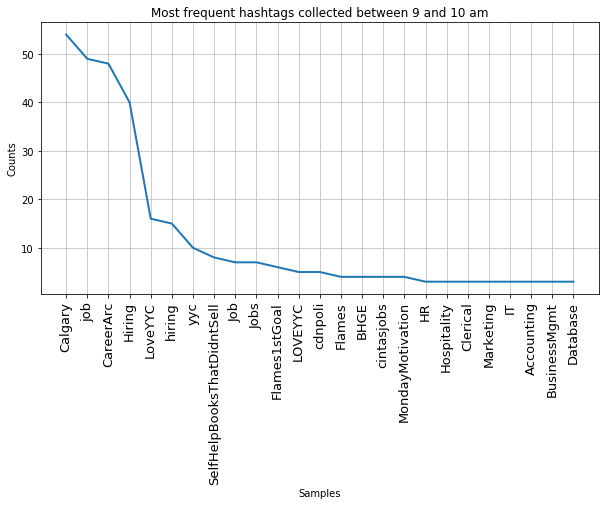

In [102]:
### will be hidden
tweets_subset_hr9=tweets.loc[tweets["created_at_date"].dt.hour==9]
hr9_hashtags=" ".join([i for i in tweets_subset_hr9['hashtags_string']]).split()
plt.figure(figsize=(10,5))
plt.title("Most frequent hashtags collected between 9 and 10 am")
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(hr9_hashtags)
fd.plot(25)

### `User_location` column

In [103]:
print("Number of unique user locations:", len(tweets["user_location"].unique()), "\n")
print(tweets["user_location"].unique())

Number of unique user locations: 755 

['Toronto ✈ Calgary' 'YYC' 'Calgary' '🌎📱' 'Calgary, Alberta' nan
 'Calgary, AB' 'Montreal' 'Montréal, Québec' '¯\\_(ツ)_/¯' '524 17 AVE SW'
 'Calgary, Alberta, Canada' 'NYC|MTL' 'calgary , alberta, canada'
 'Traphouse' 'Alberta, Canada' 'Tapioca, Connecticut' 'Calgary, AB, Canada'
 'Calgary, Ab' 'Calgary, Treaty 7, Alberta' 'Connaught, Calgary' 'Canada'
 'Los Angeles, CA' 'Calgary & Treaty 7' 'Edmonton, AB' 'Calgary | Toronto'
 '100+ countries' 'Calgary, Canada'
 'https://www.youtube.com/watch?v=PfRAdire3dI' 'Okotoks Alberta'
 'Calgary AB' 'Calgary Alberta' 'Okotoks, Alberta'
 'Vancouver, British Columbia' 'Scary Canadian Security risk to the US'
 'Côte-Nord-du-Golfe-du-Saint-La' 'Calgary Alberta Canada'
 'High River, Alberta' 'Calgary, Alberta ' 'Mesa, AZ' 'Seattle, WA'
 'luncheon kingdom' 'Calgary - Treaty 7' 'Ron Southern School Calgary'
 'Downtown, Calgary' 'Calgary. Alberta. Canada'
 '1104 1 Ave NE, Calgary, AB' 'ÜT: 50.9398707,-113.9842441'
 

There are 755 unique user_locations. These are locations that are entered by users in the profile and open to pretty much any input, which is why we see some odd locations in there. Not sure if this is overly interesting right now. Let's look into latitude/longitude instead.

### `Latitude/longitude` columns
We will subset data by day (to make it faster) and plot tweets that have coordinates on a map.

How are latitude/longitude added to a tweet? Do all tweets have them? How reliable is this data source? A few things to keep in mind as we go through this...

In [104]:
print("Total number of tweets: ",tweets.shape[0])
tweets_have_location=tweets[tweets["longitude"].notnull()]
print("Number of tweets having location data: ",tweets_have_location.shape[0])

tweets_subset_nov5=tweets_have_location.loc[tweets_have_location["created_at_date"].dt.day==5]
print("Number of tweets having location data for Nov 5: ",tweets_subset_nov5.shape[0])

Total number of tweets:  14793
Number of tweets having location data:  2321
Number of tweets having location data for Nov 5:  520


We can plot the location data on a map and use the library [folium](https://github.com/python-visualization/folium). We will iterate through each row in the November 5 subset of data and add the coordinates to the map where they exist. 

This can be accomplished using the [iterrrows()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html) function to iterate through dataframe rows:

In [105]:
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_nov5.iterrows():  
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

It looks like these locations are in line with what we expected. The highest distribution falls within the downtown core and if you scroll out, you'll notice that the scraper seems to have done a good job limiting the collected tweets to the Calgary region.

#### Excersise: try subsetting by user mention (e.g "calgarylibrary")
Hint: use str.contains() function applied to tweets['user_string'] colum.

In [106]:
### this will be hiddenrealDonaldTrump

tweets_subset_lib=tweets_have_location.loc[tweets['user_string'].str.contains("calgarylibrary")]
print("Number of tweets having location data that mentionin calgarylibrary",tweets_subset_lib.shape[0])
calgary_coords = [51.0486, -114.0708]
my_map = folium.Map(location = calgary_coords, zoom_start = 13)

for index,row in tweets_subset_lib.iterrows():
        folium.Marker([row["longitude"], row["latitude"]]).add_to(my_map) 
my_map

Number of tweets having location data that mentionin calgarylibrary 14


I wonder which library is inspiring the most tweets in our dataset :)

### `Screen_name` column

Let's look at some summary stats.

In [107]:
print("Total number of tweets: ",tweets.shape[0])
print("Total number of users: ",tweets['screen_name'].unique().shape[0])
print("Top 20 most active users:")
tweets["screen_name"].groupby(tweets["screen_name"]).count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)#.plot(kind="bar")

Total number of tweets:  14793
Total number of users:  2897
Top 20 most active users:


,screen_name,count
10,311calgary,437
765,LMHPhotog,284
2314,mgcanmore,213
2241,lisa_m_228,210
2351,montrealdesign,173
652,JasonP_YYC,159
2793,trevormarr1,157
1029,PaulBruce_Ouch,154
1089,Rarcham2018,150
2388,nattyroons,112


What else could we investigate using screen names? This seems to make sense and doesn't seem out of the ordinary. There are definitely some very active accounts and I would suspect the 311calgary account is most likely an automated account. 

### Save data to csv
We have done a whole lot of exploring and some additonal data wrangling that has changed the data, so let's save an updated dataset to csv.

In [ ]:
tweets.to_csv('tweets_cleaned1.csv',index=False)

##  Conclusion

We've done some data exploration in order to try to understand the data better. Our time spent on each column definitely depended on how much interest there is in each column. Since we will continue to work with the text data, that is where we started and spent most of our time on. 

Take-aways: 
* Data exploration helps provide a sense of the data that is there and often reveals interesting trends and patterns 
* Always consider both exploring the data using summary statistics along with data visualizations
* Think about what you would expect the data to look like going into it and determine whether your assumptions hold up. If not, why not? This could tell you important things about your data. 
* Subject matter expertise is invaluable in data science, including in the exploration phase. A solid understanding of how Twitter is used, or working with someone who does, can often quickly resolve questions that could otherwise take hours to answer. 

Next, we will go deeper into natural language processing, will  build topic models  and do sentiment analysis